In [1]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Opdracht 1: Een functie voor m aantal getallen Z_n
# voor een stochast X_k ~ Un(0,1) geldt: verwachting mu = 0,5 en variantie sigma^2 = 1/12, dus sigma = sqrt(1/12)
mu = 0.5
sigma_2 = 1.0/12.0

def simuleer(n, m): # n is het aantal stochasten en m het aantal getallen
    Z_n = []
    for i in range(m):
        S_n = 0
        for j in range(n):
            S_n += rd.random() # Optellen van n X_k stochasten met elk een verdeling volgens Un(0,1)
        Z_n.append((S_n-n*mu)/(np.sqrt(sigma_2*n))) # Berekenen van Z_n
    return Z_n


In [3]:
# Opdracht 2: Simuleer normaalverdeling voor n=2 en n=10
Z_2 = simuleer(2, 100000)
Z_10 = simuleer(10, 100000)

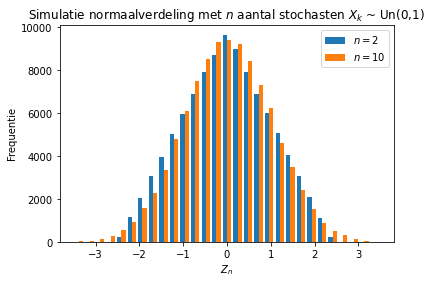

In [4]:
# Opdracht 3: Tekenen van het histogram met Z_2 en Z_10
randen = np.linspace(-3.5, 3.5, 30)
plt.hist([Z_2, Z_10], randen, label=['$n=2$', '$n=10$'])
plt.legend()
plt.title('Simulatie normaalverdeling met $n$ aantal stochasten $X_k$ ~ Un(0,1)')
plt.xlabel('$Z_n$')
plt.ylabel('Frequentie')
plt.show()

In [5]:
# Opdracht 4: Bereken KS-statistieken
stat2 = stats.kstest(Z_2, 'norm')[0]
stat10= stats.kstest(Z_10, 'norm')[0]
print('KS-statistiek voor n = 2 : ', stat2)
print('KS-statistiek voor n = 10 : ', stat10)

KS-statistiek voor n = 2 :  0.018707687115016802
KS-statistiek voor n = 10 :  0.003477201888415604


In [6]:
# Opdracht 5:
n = [x for x in range(1, 26)]
ks_stats = []

for i in n:
    statn= stats.kstest(simuleer(i, 100000), 'norm')[0]
    ks_stats.append(statn)

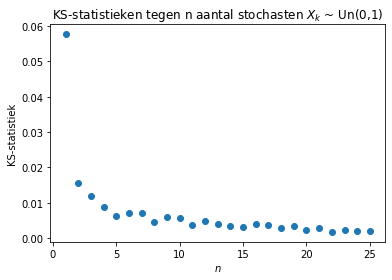

In [7]:
# Opdracht 6: Scatterplot met X_k ~ Un(0,1)
plt.scatter(n, ks_stats)
plt.title('KS-statistieken tegen n aantal stochasten $X_k$ ~ Un(0,1)')
plt.xlabel('$n$')
plt.ylabel('KS-statistiek')
plt.show()

In [8]:
# Opdracht 7
# voor een stochast X_k ~ Exp(1) geldt: verwachting mu = 1 en variantie sigma^2 = 1, dus sigma = 1
mu_exp = 1
sigma_2_exp = 1

def inverse_exp(y):
    return -(np.log(1-y))

def simuleer_exp(n, m): # n is het aantal stochasten en m het aantal getallen
    Z_n = []
    for i in range(m):
        S_n = 0
        for j in range(n):
            S_n += inverse_exp(rd.random()) # Optellen van n X_k stochasten met elk een verdeling volgens Exp(1)
        Z_n.append((S_n-n*mu_exp)/(np.sqrt(sigma_2_exp*n))) # Berekenen van Z_n
    return Z_n

In [9]:
# Simuleer normaalverdeling
Z_2_exp = simuleer_exp(2, 100000)
Z_10_exp = simuleer_exp(10, 100000)

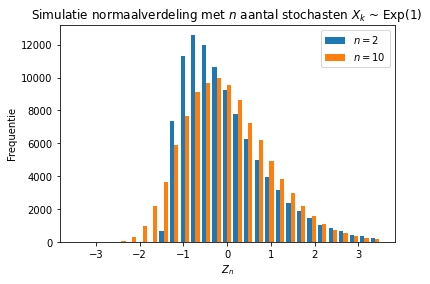

In [10]:
# Tekenen van het histogram met Z_2_exp en Z_10_exp
randen = np.linspace(-3.5, 3.5, 30)
plt.hist([Z_2_exp, Z_10_exp], randen, label=['$n=2$', '$n=10$'])
plt.legend()
plt.title('Simulatie normaalverdeling met $n$ aantal stochasten $X_k$ ~ Exp(1)')
plt.xlabel('$Z_n$')
plt.ylabel('Frequentie')
plt.show()

In [11]:
# Berekenen van KS-statistieken
n = [x for x in range(1, 26)]
ks_stats_exp = []

for i in n:
    statn = stats.kstest(simuleer_exp(i, 100000), 'norm')[0]
    ks_stats_exp.append(statn)

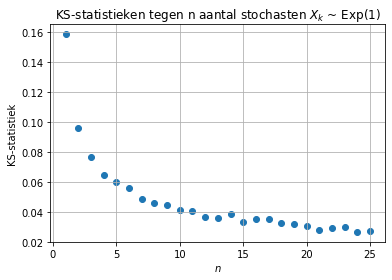

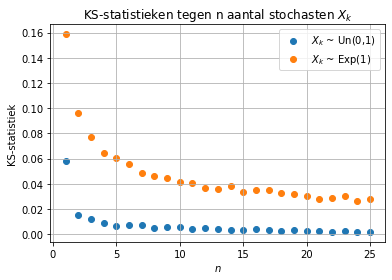

In [12]:
# Scatterplot met X_k ~ Exp(1)
n = [x for x in range(1, 26)]
plt.scatter(n, ks_stats_exp)
plt.grid()
plt.title('KS-statistieken tegen n aantal stochasten $X_k$ ~ Exp(1)')
plt.xlabel('$n$')
plt.ylabel('KS-statistiek')
plt.show()

# Scatterplot met KS-statestieken voor beide verdelingen:
plt.scatter(n, ks_stats, label='$X_k$ ~ Un(0,1)')
plt.scatter(n, ks_stats_exp, label='$X_k$ ~ Exp(1)')
plt.legend()
plt.grid()
plt.title('KS-statistieken tegen n aantal stochasten $X_k$')
plt.xlabel('$n$')
plt.ylabel('KS-statistiek')
plt.show()

In [13]:
# Opdracht 8
# De simulatie met de stochasten volgens de uniforme verdeling
# lijkt met n = 2 al meer op een normaalverdeling dan de 
# simulatie met stochasten volgens de exponentiële verdeling.
# Dit verklaart dat de KS-waarden bij de uniforme verdeling aan
# het begin lager liggen dan bij de exponentiële verdeling.
# Bovendien is de uniforme verdeling

In [14]:
# Opdracht 9:
def Q_j():
    return rd.randrange(-1,2,2)

def Y(k):
    Y_k = 0
    for i in range(2*k-1):
        Y_k += Q_j()
    return Y_k

# voor een stochast X_k geldt in dit geval: verwachting mu = 0,5 en variantie sigma^2 = 3/12 = 1/4, dus
mu_drk = 0.5
sigma_2_drk = 1.0/4.0
def simuleer_drk(n, m): # n is het aantal stochasten en m het aantal getallen
    Z_n = []
    for i in range(m):
        S_n = 0
        for j in range(n):
            if Y(j+1) < 0:
                X_k = 0
            else:
                X_k = 1
            S_n += X_k
        Z_n.append((S_n-n*mu_drk)/(np.sqrt(sigma_2_drk*n))) # Berekenen van Z_n
    return Z_n

In [15]:
# Simuleer normaalverdeling
Z_2_drk = simuleer_drk(2, 100000)
Z_4_drk = simuleer_drk(4, 100000)

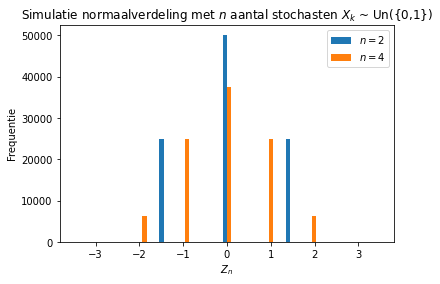

In [16]:
# Tekenen van het histogram met Z_2_drk en Z_4_drk
randen = np.linspace(-3.5, 3.5, 30)
plt.hist([Z_2_drk, Z_4_drk], randen, label=['$n=2$', '$n=4$'])
plt.legend()
plt.title('Simulatie normaalverdeling met $n$ aantal stochasten $X_k$ ~ Un({0,1})')
plt.xlabel('$Z_n$')
plt.ylabel('Frequentie')
plt.show()

In [17]:
# Opdracht 10:
n = [x for x in range(1, 8)]
ks_stats_drk = []

for i in n:
    statn = stats.kstest(simuleer_drk(i, 100000), 'norm')[0]
    ks_stats_drk.append(statn)

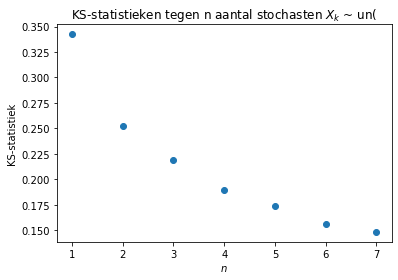

In [18]:
# Scatterplot met X_k ~ Un({0,1})
plt.scatter(n, ks_stats_drk)
plt.title('KS-statistieken tegen n aantal stochasten $X_k$ ~ Un({0,1})')
plt.xlabel('$n$')
plt.ylabel('KS-statistiek')
plt.show()

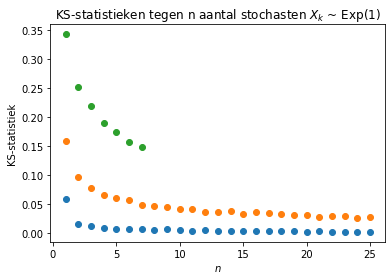

In [19]:
# Scatterplot met KS-statestieken voor alle drie verdelingen:
n = [x for x in range(1, 26)]
plt.scatter(n, ks_stats)
plt.scatter(n, ks_stats_exp)
n = [x for x in range(1, 8)]
plt.scatter(n, ks_stats_drk)
plt.title('KS-statistieken tegen n aantal stochasten $X_k$ ~ Exp(1)')
plt.xlabel('$n$')
plt.ylabel('KS-statistiek')
plt.show()

In [20]:
# In de histogram voor met n = 2 en n = 4 is te zien dat
# er maar een paar balken te zien zijn, dit komt omdat er
# maar een discreet aantal waardes mogelijk zijn voor Z_n.
# Ook is er te zien dat er voor grotere n er meer verschillende
# discrete waarde zijn, bij n = 2 bv. 3 en bij n = 4: 5.
# Bij de KS-statistieken is te zien dat bij deze verdeling
# de KS-waarde hoger ligt en minder snel naar 0 convergeert.
# Dit ligt vooral aan het feit dat de verdeling discreet is,
# terwijl de normaalverdeling continu is.